In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_excel('Credit_Ratings.xlsx')

In [11]:
df

,Fitch_grade,Fitch_observed_DR,Moodys_grade,Moodys_observed_DR,SnP_grade,SnP_observed_DR
0,AAA,0.0012,Aaa,0.0000,AAA,0.0000
1,AA+,0.0000,Aa1,0.0000,AA+,0.0000
2,AA,0.0000,Aa2,0.0000,AA,0.0002
3,AA-,0.0008,Aa3,0.0004,AA-,0.0003
4,A+,0.0000,A1,0.0006,A+,0.0005
5,A,0.0007,A2,0.0004,A,0.0005
6,A-,0.0006,A3,0.0006,A-,0.0006
7,BBB+,0.0009,Baa1,0.0012,BBB+,0.0010
8,BBB,0.0006,Baa2,0.0016,BBB,0.0016
9,BBB-,0.0026,Baa3,0.0022,BBB-,0.0025


In [12]:
def monot(PD):
    for i in range(1,len(PD)):
        if PD[i]<PD[i-1]:
            j=i
            while((j<len(PD)) and (PD[j]<PD[i-1])):
                j=j+1
            if PD[j]>=PD[i-1]:
                right=np.linspace(PD[i-1],PD[j],j-i+2)
                for k in range(i-1,j):
                    PD[k]=right[k-i+1]
            else: 
                PD[i]=PD[i-1]
    return PD

In [13]:
X=pd.DataFrame()
a=np.linspace(0.01,100,10000)
x=np.linspace(0,1,len(df))
for ca in a:
    X['exp('+str(ca)+'x)']=np.exp(ca*x)

X['1']=np.ones(len(X))


In [14]:
X


,exp(0.01x),exp(0.02x),exp(0.03x),exp(0.04x),exp(0.05x),exp(0.060000000000000005x),exp(0.06999999999999999x),exp(0.08x),exp(0.09x),exp(0.09999999999999999x),...,exp(99.92x),exp(99.93x),exp(99.94000000000001x),exp(99.95x),exp(99.96000000000001x),exp(99.97000000000001x),exp(99.98x),exp(99.99000000000001x),exp(100.0x),1
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
1,1.000500,1.001001,1.001501,1.002002,1.002503,1.003005,1.003506,1.004008,1.004510,1.005013,...,1.478207e+02,1.478946e+02,1.479686e+02,1.480426e+02,1.481166e+02,1.481907e+02,1.482648e+02,1.483390e+02,1.484132e+02,1.0
2,1.001001,1.002002,1.003005,1.004008,1.005013,1.006018,1.007025,1.008032,1.009041,1.010050,...,2.185096e+04,2.187282e+04,2.189470e+04,2.191661e+04,2.193854e+04,2.196049e+04,2.198246e+04,2.200445e+04,2.202647e+04,1.0
3,1.001501,1.003005,1.004510,1.006018,1.007528,1.009041,1.010555,1.012072,1.013592,1.015113,...,3.230024e+06,3.234872e+06,3.239728e+06,3.244591e+06,3.249462e+06,3.254340e+06,3.259225e+06,3.264118e+06,3.269017e+06,1.0
4,1.002002,1.004008,1.006018,1.008032,1.010050,1.012072,1.014098,1.016129,1.018163,1.020201,...,4.774643e+08,4.784202e+08,4.793780e+08,4.803377e+08,4.812994e+08,4.822629e+08,4.832284e+08,4.841958e+08,4.851652e+08,1.0
5,1.002503,1.005013,1.007528,1.010050,1.012578,1.015113,1.017654,1.020201,1.022755,1.025315,...,7.057911e+10,7.075578e+10,7.093289e+10,7.111044e+10,7.128844e+10,7.146688e+10,7.164577e+10,7.182511e+10,7.200490e+10,1.0
6,1.003005,1.006018,1.009041,1.012072,1.015113,1.018163,1.021222,1.024290,1.027368,1.030455,...,1.043305e+13,1.046440e+13,1.049584e+13,1.052737e+13,1.055900e+13,1.059073e+13,1.062255e+13,1.065446e+13,1.068647e+13,1.0
7,1.003506,1.007025,1.010555,1.014098,1.017654,1.021222,1.024803,1.028396,1.032001,1.035620,...,1.542221e+15,1.547628e+15,1.553054e+15,1.558500e+15,1.563964e+15,1.569447e+15,1.574950e+15,1.580472e+15,1.586013e+15,1.0
8,1.004008,1.008032,1.012072,1.016129,1.020201,1.024290,1.028396,1.032518,1.036656,1.040811,...,2.279722e+17,2.288859e+17,2.298033e+17,2.307243e+17,2.316491e+17,2.325775e+17,2.335097e+17,2.344456e+17,2.353853e+17,1.0
9,1.004510,1.009041,1.013592,1.018163,1.022755,1.027368,1.032001,1.036656,1.041331,1.046028,...,3.369901e+19,3.385099e+19,3.400367e+19,3.415703e+19,3.431108e+19,3.446583e+19,3.462127e+19,3.477742e+19,3.493427e+19,1.0


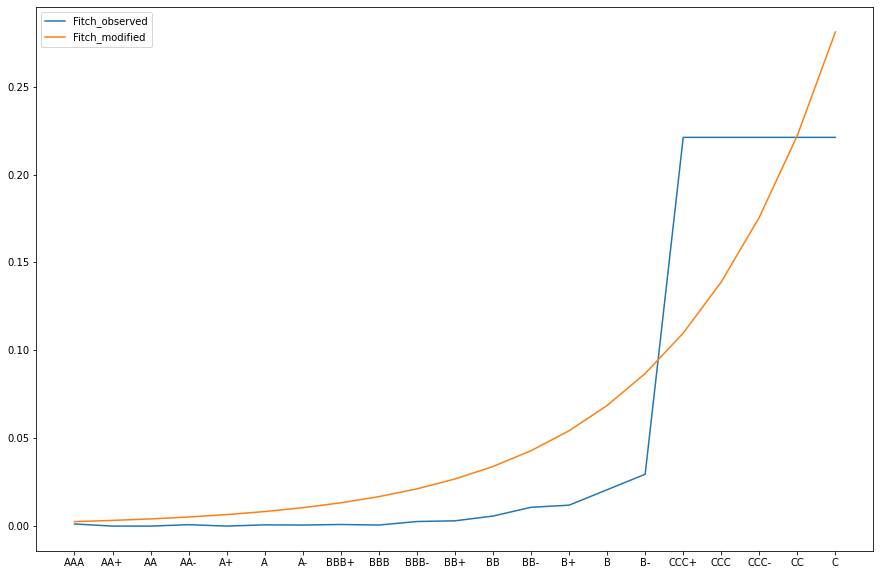

In [15]:
PD=monot(df.Fitch_observed_DR.copy())
reg = LinearRegression(normalize=True,positive=True,fit_intercept=False).fit(X, PD)
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.plot(df['Fitch_grade'],df.Fitch_observed_DR,label='Fitch_observed')
ax.plot(df['Fitch_grade'],reg.predict(X),label='Fitch_modified')
plt.legend(loc='best')
plt.show()
df.insert(loc=1,column='Fitch_modified_DR',value=reg.predict(X))
#df.insert(loc=1,column='Fitch_modified_DR')

In [25]:
df

,Fitch_grade,Fitch_modified_DR,Fitch_observed_DR,Moodys_grade,Moodys_modified_DR,Moodys_observed_DR,SnP_grade,SnP_modified_DR,SnP_observed_DR
0,AAA,0.002555,0.0012,Aaa,0.000245,0.0000,AAA,0.001543,0.0000
1,AA+,0.003233,0.0000,Aa1,0.000351,0.0000,AA+,0.002048,0.0000
2,AA,0.004089,0.0000,Aa2,0.000502,0.0000,AA,0.002720,0.0002
3,AA-,0.005172,0.0008,Aa3,0.000718,0.0004,AA-,0.003611,0.0003
4,A+,0.006543,0.0000,A1,0.001028,0.0006,A+,0.004795,0.0005
5,A,0.008277,0.0007,A2,0.001472,0.0004,A,0.006366,0.0005
6,A-,0.010470,0.0006,A3,0.002106,0.0006,A-,0.008453,0.0006
7,BBB+,0.013244,0.0009,Baa1,0.003014,0.0012,BBB+,0.011223,0.0010
8,BBB,0.016753,0.0006,Baa2,0.004314,0.0016,BBB,0.014902,0.0016
9,BBB-,0.021192,0.0026,Baa3,0.006174,0.0022,BBB-,0.019786,0.0025


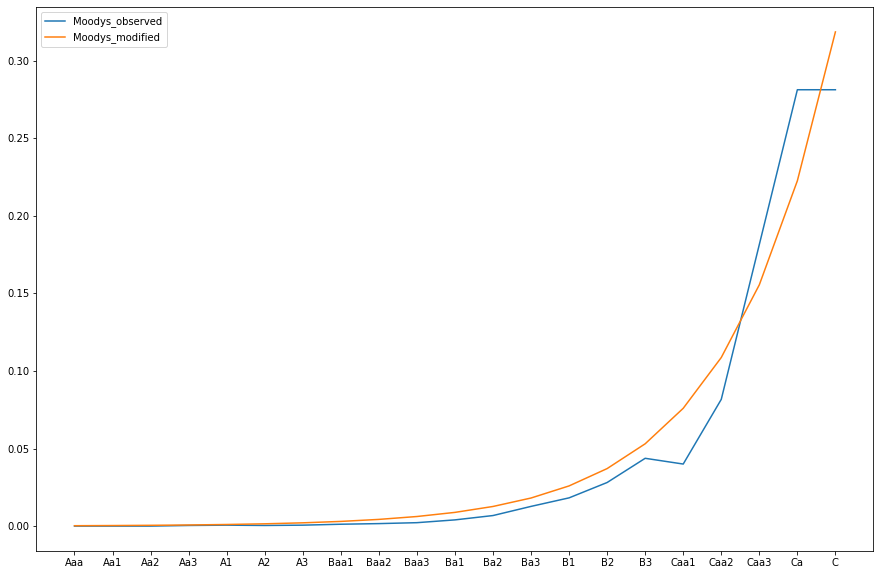

In [17]:
PD=monot(df.Moodys_observed_DR.copy())
reg = LinearRegression(normalize=True,positive=True,fit_intercept=False).fit(X, PD)
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.plot(df['Moodys_grade'],df.Moodys_observed_DR,label='Moodys_observed')
ax.plot(df['Moodys_grade'],reg.predict(X),label='Moodys_modified')
plt.legend(loc='best')
plt.show()
df.insert(loc=4,column='Moodys_modified_DR',value=reg.predict(X))


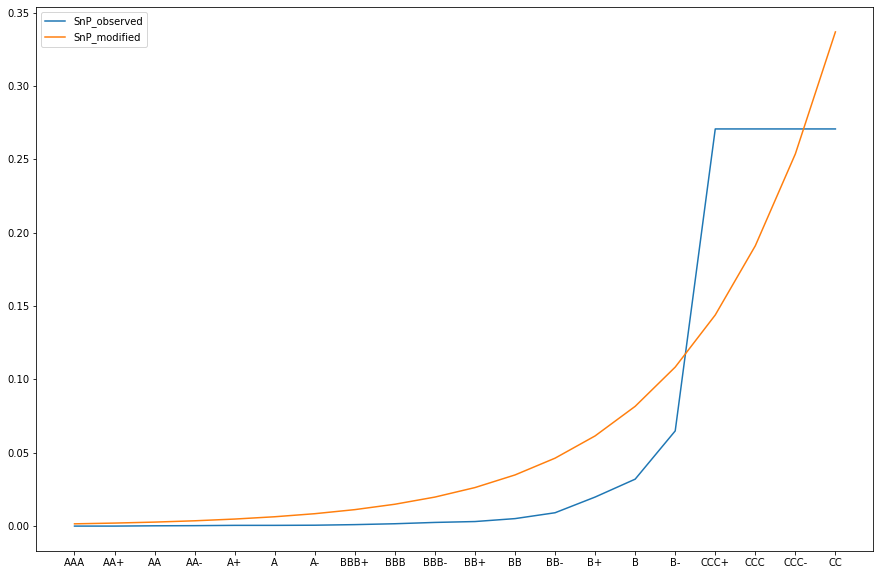

In [19]:
PD=monot(df.SnP_observed_DR.copy().dropna())
reg = LinearRegression(normalize=True,positive=True,fit_intercept=False).fit(X[0:len(X)-1], PD)
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.plot(df['SnP_grade'].dropna(),df.SnP_observed_DR.dropna(),label='SnP_observed')
ax.plot(df['SnP_grade'].dropna(),reg.predict(X[0:len(X)-1]),label='SnP_modified')
plt.legend(loc='best')
plt.show()
df.insert(loc=7,column='SnP_modified_DR',value=reg.predict(X))

In [24]:
df['SnP_modified_DR'][len(X)-1]=np.NaN

In [118]:
for i in reg.coef_:
    if i!=0:
        print(i)

0.0015426023528843033


In [ ]:
X.concat()

In [134]:
X.iloc[:,0].shift().fillna(0)

0     0.000000
1     1.000000
2     1.000500
3     1.001001
4     1.001501
5     1.002002
6     1.002503
7     1.003005
8     1.003506
9     1.004008
10    1.004510
11    1.005013
12    1.005515
13    1.006018
14    1.006521
15    1.007025
16    1.007528
17    1.008032
18    1.008536
19    1.009041
20    1.009545
Name: exp(0.01x), dtype: float64

In [140]:
a[10]-a[9]

0.010000000000000009

In [141]:
a[15]-a[14]

0.009999999999999981

In [28]:
df.to_excel('default_curves.xlsx')

In [27]:
df

,Fitch_grade,Fitch_modified_DR,Fitch_observed_DR,Moodys_grade,Moodys_modified_DR,Moodys_observed_DR,SnP_grade,SnP_modified_DR,SnP_observed_DR
0,AAA,0.002555,0.0012,Aaa,0.000245,0.0000,AAA,0.001543,0.0000
1,AA+,0.003233,0.0000,Aa1,0.000351,0.0000,AA+,0.002048,0.0000
2,AA,0.004089,0.0000,Aa2,0.000502,0.0000,AA,0.002720,0.0002
3,AA-,0.005172,0.0008,Aa3,0.000718,0.0004,AA-,0.003611,0.0003
4,A+,0.006543,0.0000,A1,0.001028,0.0006,A+,0.004795,0.0005
5,A,0.008277,0.0007,A2,0.001472,0.0004,A,0.006366,0.0005
6,A-,0.010470,0.0006,A3,0.002106,0.0006,A-,0.008453,0.0006
7,BBB+,0.013244,0.0009,Baa1,0.003014,0.0012,BBB+,0.011223,0.0010
8,BBB,0.016753,0.0006,Baa2,0.004314,0.0016,BBB,0.014902,0.0016
9,BBB-,0.021192,0.0026,Baa3,0.006174,0.0022,BBB-,0.019786,0.0025
